In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
def wordcount_from_predictionstring(pstr: str) -> int:
    return len(pstr.split(" "))

In [3]:
labels = ['Lead', 'Position', 'Claim', 'Counterclaim', 'Rebuttal', 'Evidence', 'Concluding Statement']
label_counts = [0] * len(labels)

word_counts = {}
for label in labels:
    word_counts[label] = []

In [4]:
filename = 'goldstandard-clusters/goldstandard_0.csv'
with open(filename, newline='') as csvfile:
    label_reader = csv.reader(csvfile)
    label_reader.__next__()
    count = 0
    for row in label_reader:
        count += 1
        for li, label in enumerate(labels):
            if row[5] == label:
                label_counts[li] += 1

        word_counts[row[5]].append(wordcount_from_predictionstring(row[7]))
    print("Read", count, "rows of", filename)

print("label counts:", label_counts)

Read 7285 rows of goldstandard-clusters/goldstandard_0.csv
label counts: [452, 887, 2499, 95, 68, 2481, 803]


In [5]:
# normalize counts
label_frequencies = [f / sum(label_counts) for f in label_counts]
print("label frequencies:", label_frequencies)

label frequencies: [0.062045298558682224, 0.12175703500343171, 0.34303363074811255, 0.013040494166094716, 0.009334248455730955, 0.3405628002745367, 0.11022649279341112]


<BarContainer object of 7 artists>

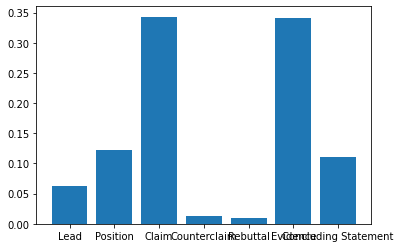

In [6]:
fig, ax = plt.subplots()
ax.bar(labels, label_frequencies)

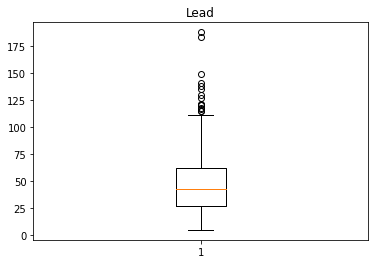

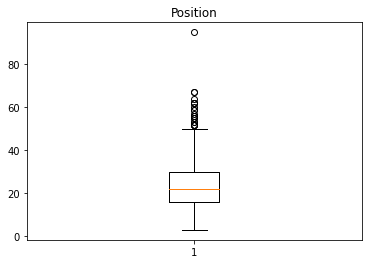

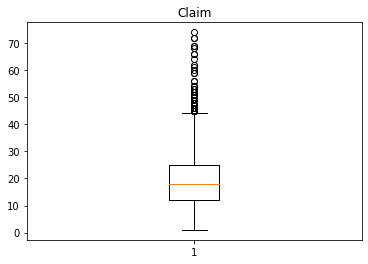

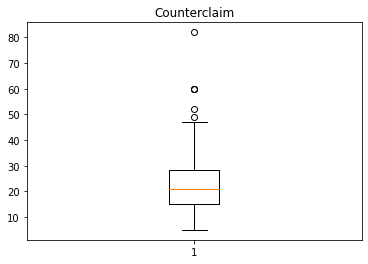

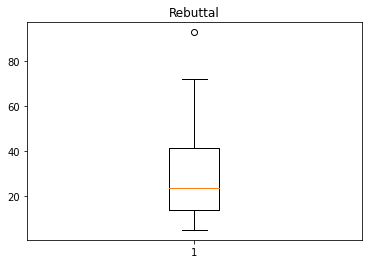

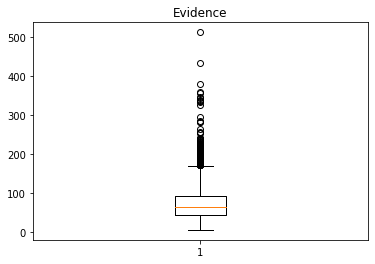

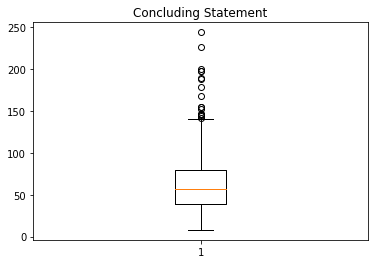

In [7]:
for label in labels:
    figb, axb = plt.subplots()
    axb.set_title(label)
    axb.boxplot(word_counts[label])